# Transfer Learning with TensorFlow Part 2: Fine-tuning

In the precious notebook, we Convered transfer learning feature extraction, now it's time to leran about a new kind of transfer learning called fine-tuning

## Creating helper functions
Let's just try to add them with out needing to make them each time ...

## Creating helper function:
IN precious notebook bunch of helper functions were made...
Let's import them to this notebook


In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-06-09 12:51:51--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-06-09 12:51:51 (110 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, walk_through_dir

# Let's get the damn data
But this time we'll see how we can use the pretrained models within tf.keras.applications and apply them to our own problem (recognizing the images of food)


In [3]:
# Get 10% of the food 101 data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip


--2024-06-09 12:52:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.207, 173.194.194.207, 173.194.195.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   183MB/s    in 0.9s    

2024-06-09 12:52:04 (183 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
import zipfile
zip_path = "/content/10_food_classes_10_percent.zip"
zip_ref = zipfile.ZipFile(zip_path, "r")
zip_ref.extractall()
zip_ref.close()

In [5]:
# Check out how mant images and sundirectories are in out dataset
walk_through_dir("/content/10_food_classes_10_percent")

There are 2 directories and 0 images in '/content/10_food_classes_10_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '/content/10_food_classe

In [6]:
# Create training data and test directory paths
train_dir = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"

In [7]:
# Create data inputs
import tensorflow as tf
IMG_SIZE = (224, 224) # define image size
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical", # what type are the labels?
                                                                            batch_size=32) # batch_size is 32 by default, this is generally a good number
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical")


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [8]:
train_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [9]:
# Check out the class names of our data set
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [10]:
train_data_10_percent.take

<bound method DatasetV2.take of <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>>

In [11]:
# See an example of a batch of data
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[254.        254.        254.       ]
   [254.        254.        254.       ]
   [254.        254.        254.       ]
   ...
   [254.        254.        254.       ]
   [254.        254.        254.       ]
   [254.        254.        254.       ]]

  [[254.        254.        254.       ]
   [254.        254.        254.       ]
   [254.        254.        254.       ]
   ...
   [254.        254.        254.       ]
   [254.        254.        254.       ]
   [254.        254.        254.       ]]

  [[254.        254.        254.       ]
   [254.        254.        254.       ]
   [254.        254.        254.       ]
   ...
   [254.        254.        254.       ]
   [254.        254.        254.       ]
   [254.        254.        254.       ]]

  ...

  [[254.        254.        254.       ]
   [254.        254.        254.       ]
   [254.        254.        254.       ]
   ...
   [254.        254.        254.       ]
   [254.        254.        254.       ]
   [2

In [12]:
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Rescaling
from keras.optimizers import Adam
import tensorflow_hub as hub


def model_creator(url, number_of_classes = 10):
  feature_extractor = hub.KerasLayer(url,
                                     input_shape = (224, 224, 3),
                                     trainable = False)

  model = tf.keras.Sequential([

      Rescaling(1./255, input_shape= IMG_SIZE +(3,)),
      feature_extractor,
      Dense(10, activation = "softmax")
  ])

  return model

In [13]:
efficientnet_url = "https://www.kaggle.com/models/google/efficientnet-v2/TensorFlow2/imagenet1k-b1-feature-vector/2"

efficientnet_model = model_creator(url = efficientnet_url,
                                   number_of_classes = 10)


In [14]:
# Creating a callback

class myCallBacks(tf.keras.callbacks.Callback):
  def stop_on_epochs(self, epochs, logs = {}):
    if(logs.get("val_accuracy")>= 0.9):
      self.model_stop_training = True
callback = myCallBacks()

In [15]:
# Compile the model
efficientnet_model.compile(loss = "categorical_crossentropy",
                           optimizer = Adam(lr = 0.03),
                           metrics = ["accuracy"])

# Fit the data onto the model
efficientnet_model.fit(train_data_10_percent,
                       epochs = 5,
                       steps_per_epoch = len(train_data_10_percent),
                       validation_data = test_data,
                       validation_steps = len(test_data),
                       callbacks = [callback])

Epoch 1/5
24/24 [==============================] - 24s 473ms/step - loss: 1.9256 - accuracy: 0.3853 - val_loss: 1.4325 - val_accuracy: 0.6616
Epoch 2/5
24/24 [==============================] - 7s 294ms/step - loss: 1.2201 - accuracy: 0.7053 - val_loss: 1.0354 - val_accuracy: 0.7432
Epoch 3/5
24/24 [==============================] - 8s 338ms/step - loss: 0.9237 - accuracy: 0.7760 - val_loss: 0.8697 - val_accuracy: 0.7708
Epoch 4/5
24/24 [==============================] - 7s 282ms/step - loss: 0.7675 - accuracy: 0.8067 - val_loss: 0.7816 - val_accuracy: 0.7856
Epoch 5/5
24/24 [==============================] - 8s 317ms/step - loss: 0.6642 - accuracy: 0.8280 - val_loss: 0.7242 - val_accuracy: 0.7912


In [16]:
efficientnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1280)              6931124   
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 6943934 (26.49 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 6931124 (26.44 MB)
_________________________________________________________________


# Model 0: Building a transfer learning Feature extraction model using the Keras functional API

The Sequantial APi is straight-forward, it runs our layers in sequential order.
But the functional API gives us more flexibility with our models.

In [17]:
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

# OLD
# base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# 4. If using ResNet50V2, add this to speed up convergence, remove for EfficientNetV2
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base_model (note: using tf.keras.applications, EfficientNetV2 inputs don't have to be normalized)
x = base_model(inputs)
# Check data shape after passing it to base_model
print(f"Shape after base_model: {x.shape}")

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 10. Fit the model (we use less steps for validation so it's faster)
history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data=test_data,
                                 # Go through less of the validation data so epochs are faster (we want faster experiments!)
                                 validation_steps=int(0.25 * len(test_data)),
                                 # Track our model's training logs for visualization later
                                 callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")])


24274472/24274472 [==============================] - 0s 0us/step
Shape after base_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20240609-125325
Epoch 1/5
24/24 [==============================] - 15s 244ms/step - loss: 1.7826 - accuracy: 0.4827 - val_loss: 1.2470 - val_accuracy: 0.7599
Epoch 2/5
24/24 [==============================] - 4s 133ms/step - loss: 1.0843 - accuracy: 0.7680 - val_loss: 0.8254 - val_accuracy: 0.8553
Epoch 3/5
24/24 [==============================] - 4s 172ms/step - loss: 0.7976 - accuracy: 0.8227 - val_loss: 0.6790 - val_accuracy: 0.8503
Epoch 4/5
24/24 [==============================] - 5s 205ms/step - loss: 0.6562 - accuracy: 0.8600 - val_loss: 0.5887 - val_accuracy: 0.8734
Epoch 5/5
24/24 [==============================] - 3s 127ms/step - loss: 0.5776 - accuracy: 0.8693 - val_loss: 0.5348 - val_accuracy: 0.8717


In [18]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
__________________

In [19]:
# Evaluate the data
model_0.evaluate(test_data)

79/79 [==============================] - 5s 59ms/step - loss: 0.5472 - accuracy: 0.8648


[0.5472422242164612, 0.864799976348877]

In [20]:
# Check the layers in our base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling_1
2 normalization
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 blo

In [21]:
# lets get another summary from the data
base_model.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling_1 (Rescaling)     (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        0         ['rescaling_1[0][0]']         
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2D)          (None, None, None, 32)       864       ['normalizatio

In [22]:
# How about a summary of the whole model?
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
__________________

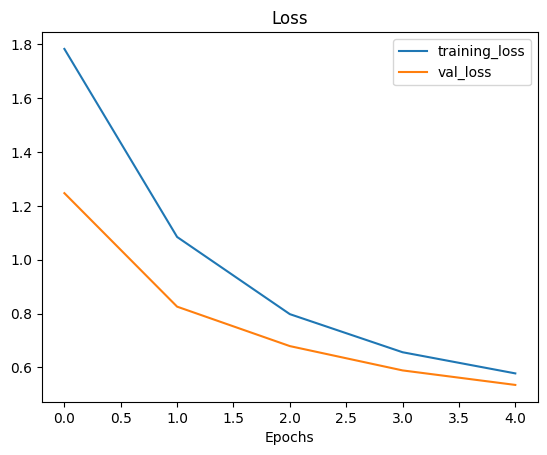

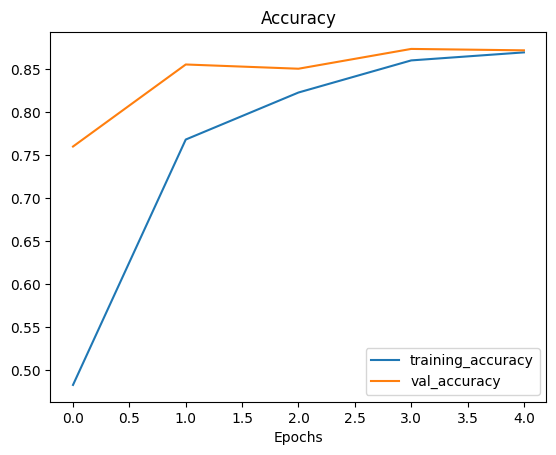

In [23]:
# Check out oue models training curves
plot_loss_curves(history_10_percent)

## Getting a feature vector from a trained model
Let's demonstrate the Global Average Pooling 2D layer...

We Have a tensor after our model goes through `base_model` of shape(None, 7, 7, 1280).

But the when it passes through GloablAveragePooling2D, it turns into(None, 1280)

Let's use a similar shaped tensor of (1, 4, 4, 3) an then pass it to GlobalAveragePooling2D

In [24]:
# Define the input shape
input_shape   = (1, 4, 4, 3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}")


# Pass athe random global tensorf to a global average pooling 2d
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")

# Check the shape of the defferent tensors
print(f"shape of input tensorss: {input_tensor.shape}")
print(f"shape of input tensorss: {global_average_pooled_tensor.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338894  0.97772694]
   [ 0.24694404  0.20573746 -0.52562326]
   [ 0.32410017  0.02545409 -0.10638496]
   [-0.63694745  1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815628  0.23479679 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]
2D global average pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]

shape of input tensorss: (1, 4, 4, 3)
shape of input tensorss: (1, 3)


In [25]:
# let's repliate the GlobalAveragePool2D layer
tf.reduce_mean(input_tensor, axis = [1, 2])


<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [26]:
# Now do the globalmaxpool2d

# Tensor shape
input_shape = (1, 4, 4, 3)

# set seed
tf.random.set_seed(42)
# Making the tensor
main_tensor = tf.random.normal(input_shape)

# Make the global version of it
global_max_pooled_2D = tf.keras.layers.GlobalMaxPooling2D()(main_tensor)

print(global_max_pooled_2D)

tf.Tensor([[0.9058464 1.1603122 1.6994323]], shape=(1, 3), dtype=float32)


In [27]:
tf.reduce_max(main_tensor, axis = [1, 2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.9058464, 1.1603122, 1.6994323]], dtype=float32)>

## Running a series of transfer leraning experiments

We've seen the incredible results transfer leraning can get only 10% of the training data, but how foes it go with 1% of the training data... how about we set ip a bunch of experiments to find out?:

1. `model_1` - use feature extraction transfer learning with 1% of the traiing data with data augmentation

2. `model_2` - use feature extraction transfer learning with 10% data of the training with data augmentation

3. `model_3` - fine tuning transfer learning on 10% if the training data with dtata augmentation

4. `model_4` - use fine-tuning transfer learning on 100% of the training data with data augmentation

Note: Throughout all wxperimetns the same test dataset will be used to evaluate out model... This ensured the consistenct across evaluation metrics.

### Getting and preporcessing the data for model 1

In [28]:
from helper_functions import unzip_data

In [29]:
# Downalod and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip


--2024-06-09 12:54:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.126.207, 74.125.132.207, 74.125.201.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.126.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   167MB/s    in 0.8s    

2024-06-09 12:54:06 (167 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [30]:
import zipfile
zip_ref = zipfile.ZipFile("/content/10_food_classes_1_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [31]:
# Create training and test dirs
train_dir_1_percent = "/content/10_food_classes_1_percent/train"
test_dir_1_percent = "/content/10_food_classes_1_percent/test"

In [32]:
# How mant images we're working with
walk_through_dir("/content/10_food_classes_1_percent")

There are 2 directories and 0 images in '/content/10_food_classes_1_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percen

In [33]:
#  Setip data loaders

IMG_SIZE = (224, 224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode = "categorical",
                                                                           image_size = IMG_SIZE,
                                                                           batch_size = 32)

test_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir_1_percent,
                                                                           label_mode = "categorical",
                                                                           image_size = IMG_SIZE,
                                                                           batch_size = 32)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Adding data augmentation right into the model

To add dta augmentation right into our models, we can use the layers inside:

* `tf.keras.layers.experimental.preprocessing()`

* This type of data augmentation benefits from GPu rather than CPU
* Image data augmentation only happenss during training, so we can still export out whole model and use it elsewhere.

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Create data augmentation stage with horizontal flipping, rotations, zoom, etc
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.Rescaling(1./255)  # This is for models other than EfficientNet
], name="data_augmentation")

### Visualize our data augmentation layer and see what happened to our data

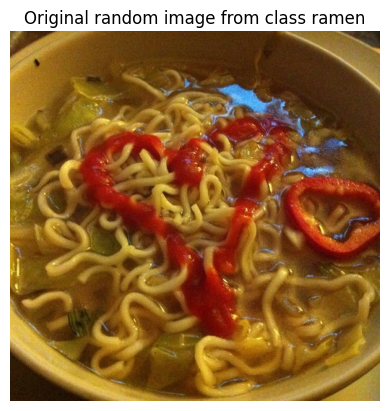

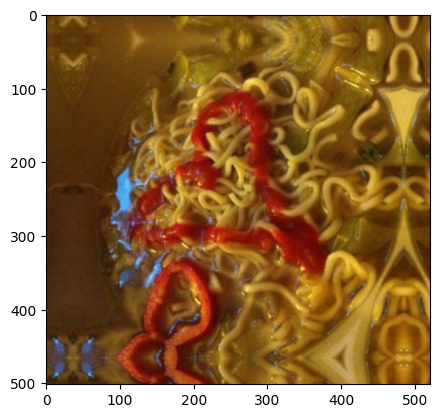

In [35]:
# View a random image and compare it to the origin image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

# Read in the random Image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f'Original random image from class {target_class}')
plt.axis(False);


# Now plot the Augmented version of it
augmented_image = data_augmentation(img)
plt.figure()
plt.imshow(augmented_image)

## Model_1: Feature extraction transfer learning on 1 percent of the data with data augmentation

In [36]:
# Setup input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1_percent = model_1.fit(train_data_1_percent,
                    epochs=5,
                    steps_per_epoch=len(train_data_1_percent),
                    validation_data=test_data,
                    validation_steps=int(0.25* len(test_data)), # validate for less steps
                    # Track model training logs
                    callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")])


Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20240609-125413
Epoch 1/5
3/3 [==============================] - 17s 3s/step - loss: 2.3967 - accuracy: 0.0286 - val_loss: 2.3156 - val_accuracy: 0.0938
Epoch 2/5
3/3 [==============================] - 7s 3s/step - loss: 2.3726 - accuracy: 0.0429 - val_loss: 2.3159 - val_accuracy: 0.1118
Epoch 3/5
3/3 [==============================] - 5s 2s/step - loss: 2.3001 - accuracy: 0.1000 - val_loss: 2.3640 - val_accuracy: 0.1102
Epoch 4/5
3/3 [==============================] - 6s 2s/step - loss: 2.3567 - accuracy: 0.0714 - val_loss: 2.3827 - val_accuracy: 0.1151
Epoch 5/5
3/3 [==============================] - 6s 2s/step - loss: 2.3206 - accuracy: 0.1000 - val_loss: 2.3686 - val_accuracy: 0.1102


In [37]:
# Checking the model_1 summary
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, 3)           0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                1281

In [38]:
# Evaluate on the test data
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 5s 59ms/step - loss: 2.3810 - accuracy: 0.1000


[2.3810482025146484, 0.10000000149011612]

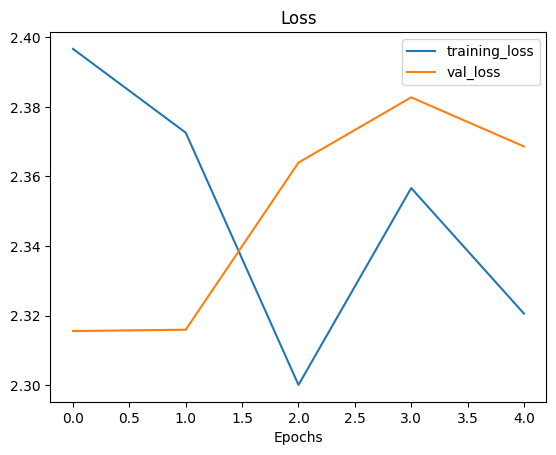

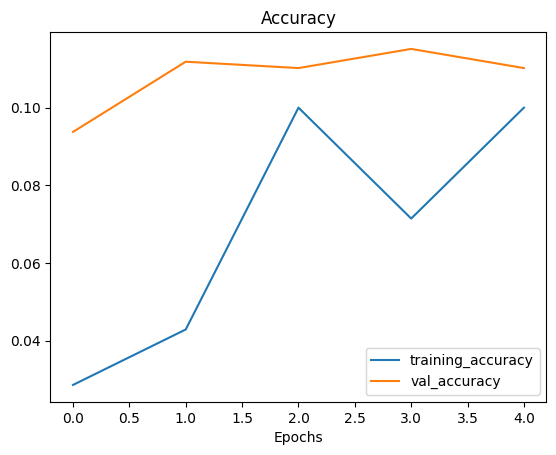

In [39]:
# How does the model go with a data augmentation layer with 1% of data
plot_loss_curves(history_1_percent)

## Model_2: Feature extraction transger learning model with 10% of the data and data augmentation

In [40]:
# Making the train test dir
train_dir_10_percent = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"

In [41]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode="categorical",
                                                                            image_size=IMG_SIZE)
# Note: the test data is the same as the previous experiment, we could
# skip creating this, but we'll leave this here to practice.
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [42]:
# Let's check the data augmentation sequential model?
data_augmentation.summary()

Model: "data_augmentation"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (512, 512, 3)             0         
                                                                 
 random_rotation (RandomRot  (512, 512, 3)             0         
 ation)                                                          
                                                                 
 random_zoom (RandomZoom)    (512, 512, 3)             0         
                                                                 
 random_height (RandomHeigh  (None, 512, 3)            0         
 t)                                                              
                                                                 
 random_width (RandomWidth)  (None, None, 3)           0         
                                                                 
 rescaling_2 (Rescaling)     (None, None, 3)     

In [43]:
# Create a functional model with data augmentation
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers.experimental import preprocessing # OLD

# NEW: Newer versions of TensorFlow (2.10+) can use the tensorflow.keras.layers API directly for data augmentation
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNet
], name ="data_augmentation")

## OLD
# # Build data augmentation layer
# data_augmentation = Sequential([
#   preprocessing.RandomFlip('horizontal'),
#   preprocessing.RandomHeight(0.2),
#   preprocessing.RandomWidth(0.2),
#   preprocessing.RandomZoom(0.2),
#   preprocessing.RandomRotation(0.2),
#   # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNet
# ], name="data_augmentation")

# Setup the input shape to our model
input_shape = (224, 224, 3)

# Create a frozen base model
# base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

# Create input and output layers
inputs = layers.Input(shape=input_shape, name="input_layer") # create input layer
x = data_augmentation(inputs) # augment our training images
x = base_model(x, training=False) # pass augmented images to base model but keep it in inference mode, so batchnorm layers don't get updated: https://keras.io/guides/transfer_learning/#build-a-model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

# Compile
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # use Adam optimizer with base learning rate
              metrics=["accuracy"])


### Creating Model_Checkpoint callbacks

The ModelCheckpoint callback intermediately saves our model
(the full model or just the weights) during training. This is useful so we can come and start where we left off

In [44]:
def create_base_model(input_shape: tuple[int, int, int] = (224, 224, 3),
                      output_shape: int = 10,
                      learning_rate: float = 0.001,
                      training: bool = False) -> tf.keras.Model:
    """
    Create a model based on EfficientNetV2B0 with built-in data augmentation.

    Parameters:
    - input_shape (tuple): Expected shape of input images. Default is (224, 224, 3).
    - output_shape (int): Number of classes for the output layer. Default is 10.
    - learning_rate (float): Learning rate for the Adam optimizer. Default is 0.001.
    - training (bool): Whether the base model is trainable. Default is False.

    Returns:
    - tf.keras.Model: The compiled model with specified input and output settings.
    """

    # Create base model
    base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
    base_model.trainable = training

    # Setup model input and outputs with data augmentation built-in
    inputs = layers.Input(shape=input_shape, name="input_layer")
    x = data_augmentation(inputs)
    x = base_model(x, training=False)  # pass augmented images to base model but keep it in inference mode
    x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
    outputs = layers.Dense(units=output_shape, activation="softmax", name="output_layer")(x)
    model = tf.keras.Model(inputs, outputs)

    # Compile model
    model.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=["accuracy"])

    return model

# Create an instance of model_2 with our new function
model_2 = create_base_model()

In [45]:
# Setup checkpoint path
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt" # note: remember saving directly to Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=True, # save only the best model weights instead of a model every epoch
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

## Fit model 2 passing in the ModelCheckpoint callback

In [46]:
# Getting the WANDB readt
!pip install wandb
import wandb
from wandb.integration.keras import WandbCallback

wandb.init(project="Model_2", entity="pouyazx4")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.6/289.6 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.6 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [47]:
# Fit the model saving checkpoints every epoch
initial_epochs = 5
history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)), # do less steps per validation (quicker)
                                          callbacks=[WandbCallback(),
                                                     checkpoint_callback])

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0506 - accuracy: 0.3213

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240609_125941-xttktcwp/files/model-best)... Done. 0.1s



Epoch 1: val_loss improved from inf to 1.53095, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 90s 3s/step - loss: 2.0506 - accuracy: 0.3213 - val_loss: 1.5309 - val_accuracy: 0.6349
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.4299 - accuracy: 0.6493

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240609_125941-xttktcwp/files/model-best)... Done. 0.1s



Epoch 2: val_loss improved from 1.53095 to 1.07429, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 59s 2s/step - loss: 1.4299 - accuracy: 0.6493 - val_loss: 1.0743 - val_accuracy: 0.7582
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.1337 - accuracy: 0.7280

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240609_125941-xttktcwp/files/model-best)... Done. 0.1s



Epoch 3: val_loss improved from 1.07429 to 0.82671, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 56s 2s/step - loss: 1.1337 - accuracy: 0.7280 - val_loss: 0.8267 - val_accuracy: 0.8273
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.9575 - accuracy: 0.7787

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240609_125941-xttktcwp/files/model-best)... Done. 0.1s



Epoch 4: val_loss improved from 0.82671 to 0.73186, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 55s 2s/step - loss: 0.9575 - accuracy: 0.7787 - val_loss: 0.7319 - val_accuracy: 0.8141
Epoch 5/5
24/24 [==============================] - ETA: 0s - loss: 0.8636 - accuracy: 0.7787

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240609_125941-xttktcwp/files/model-best)... Done. 0.1s



Epoch 5: val_loss improved from 0.73186 to 0.66103, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 53s 2s/step - loss: 0.8636 - accuracy: 0.7787 - val_loss: 0.6610 - val_accuracy: 0.8322


In [48]:
model_0.evaluate(test_data)

79/79 [==============================] - 9s 93ms/step - loss: 0.5472 - accuracy: 0.8648


[0.5472420454025269, 0.864799976348877]

In [49]:
# Load in saved model weights and evaluate model
model_2.load_weights(checkpoint_path)
loaded_weights_model_results = model_2.evaluate(test_data)


79/79 [==============================] - 10s 113ms/step - loss: 0.6728 - accuracy: 0.8244


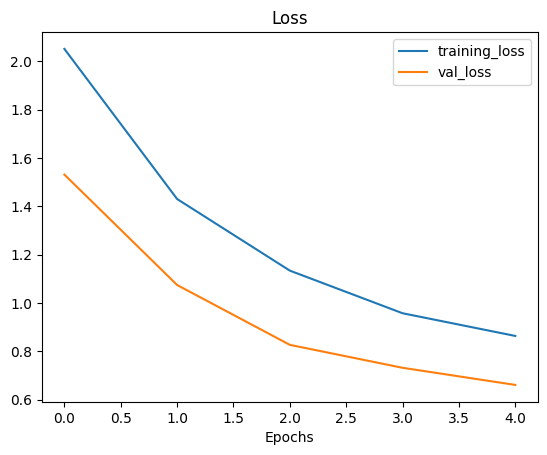

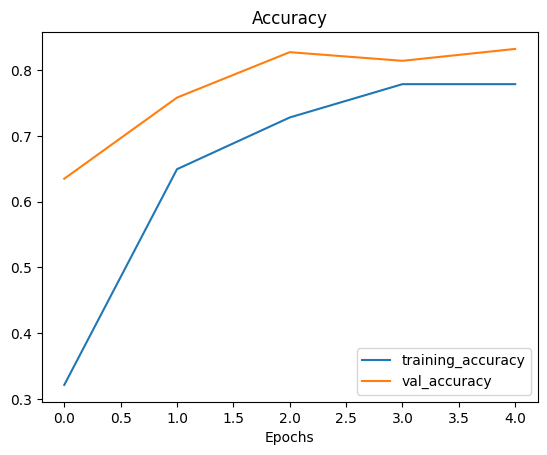

In [50]:
# Plot model liss curves
plot_loss_curves(history_10_percent_data_aug)

### Loading in checkpointed weights

Loading in checkpointed weights returns a model to a specific checkpoint

In [51]:
# Load in saved model weights and evaluate model
model_2.load_weights(checkpoint_path)
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 10s 115ms/step - loss: 0.6728 - accuracy: 0.8244


In [52]:
# Evaluate on the test data
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 9s 101ms/step - loss: 0.6728 - accuracy: 0.8244


[0.6727743744850159, 0.824400007724762]

In [53]:
import numpy as np
# Check to see if loaded model results are very close to native model results (should output True)
np.isclose(np.array(results_10_percent_data_aug), np.array(loaded_weights_model_results))


array([ True,  True])

In [54]:

# Check the difference between the two results (small values)
print(np.array(results_10_percent_data_aug) - np.array(loaded_weights_model_results))

[-1.1920929e-07  0.0000000e+00]


#### Check to see if the loaded modelresutls are veryu close to our precoue non_loaded models

import numpy as np
np.isclode(np.array(result_10_precent_data_aug), np.array(model_2.evaluate(...)))

# Model_3: Fine tunning an existing model on 10% of the data
Fine-tuning usually works the best *after* training a feature extration model for a few epochs with large amounts of costume data


In [55]:
# Layers in loaded model
model_2.layers

In [56]:
for layer_number, layer in enumerate(model_2.layers):
  print(f"Layer number: {layer_number} | Layer name: {layer.name} | Layer type: {layer} | Trainable? {layer.trainable}")

Layer number: 0 | Layer name: input_layer | Layer type: <keras.src.engine.input_layer.InputLayer object at 0x7ca3b0228fd0> | Trainable? True
Layer number: 1 | Layer name: data_augmentation | Layer type: <keras.src.engine.sequential.Sequential object at 0x7ca3c25766e0> | Trainable? True
Layer number: 2 | Layer name: efficientnetv2-b0 | Layer type: <keras.src.engine.functional.Functional object at 0x7ca3b0144a90> | Trainable? False
Layer number: 3 | Layer name: global_average_pooling_layer | Layer type: <keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7ca3b02afd00> | Trainable? True
Layer number: 4 | Layer name: output_layer | Layer type: <keras.src.layers.core.dense.Dense object at 0x7ca3b02d3b20> | Trainable? True


In [57]:
model_2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                1281

In [58]:
# Access the base_model layers of model_2
model_2_base_model = model_2.layers[2]
model_2_base_model.name

'efficientnetv2-b0'

In [59]:
# How many layers are trainable in our model_2_base_model?
print(len(model_2_base_model.trainable_variables)) # layer at index 2 is the EfficientNetV2B0 layer (the base model)


0


In [60]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(model_2_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_4 False
1 rescaling_5 False
2 normalization_3 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [61]:
# Make all the layers in model_2_base_model trainable
model_2_base_model.trainable = True

# Freeze all layers except for the last 10
for layer in model_2_base_model.layers[:-10]:
  layer.trainable = False

# Recompile the whole model (always recompile after any adjustments to a model)
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])

In [62]:
wandb.init(project="Model_3_fine_tuned", entity="pouyazx4")

accuracy,▁▆▇██
epoch,▁▃▅▆█
loss,█▄▃▂▁
val_accuracy,▁▅█▇█
val_loss,█▄▂▂▁
accuracy,0.77867
best_epoch,4
best_val_loss,0.66103
epoch,4
loss,0.86356
val_accuracy,0.83224


In [63]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               initial_epoch=history_10_percent_data_aug.epoch[-1], # start from previous last epoch
                                               validation_steps=int(0.25 * len(test_data)),
                                               callbacks=[WandbCallback()]) # name experiment appropriately


Epoch 5/10
24/24 [==============================] - ETA: 0s - loss: 0.6914 - accuracy: 0.8120

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240609_130632-y7nrk03e/files/model-best)... Done. 0.1s


24/24 [==============================] - 67s 2s/step - loss: 0.6914 - accuracy: 0.8120 - val_loss: 0.5238 - val_accuracy: 0.8355
Epoch 6/10
24/24 [==============================] - ETA: 0s - loss: 0.5888 - accuracy: 0.8320

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240609_130632-y7nrk03e/files/model-best)... Done. 0.1s


24/24 [==============================] - 51s 2s/step - loss: 0.5888 - accuracy: 0.8320 - val_loss: 0.4912 - val_accuracy: 0.8339
Epoch 7/10
24/24 [==============================] - ETA: 0s - loss: 0.5136 - accuracy: 0.8333

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240609_130632-y7nrk03e/files/model-best)... Done. 0.2s


24/24 [==============================] - 54s 2s/step - loss: 0.5136 - accuracy: 0.8333 - val_loss: 0.4755 - val_accuracy: 0.8553
Epoch 8/10
24/24 [==============================] - ETA: 0s - loss: 0.5190 - accuracy: 0.8333

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240609_130632-y7nrk03e/files/model-best)... Done. 0.1s


24/24 [==============================] - 55s 2s/step - loss: 0.5190 - accuracy: 0.8333 - val_loss: 0.4315 - val_accuracy: 0.8569
Epoch 9/10
24/24 [==============================] - 19s 763ms/step - loss: 0.4631 - accuracy: 0.8507 - val_loss: 0.4711 - val_accuracy: 0.8569
Epoch 10/10
24/24 [==============================] - ETA: 0s - loss: 0.4297 - accuracy: 0.8907

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240609_130632-y7nrk03e/files/model-best)... Done. 0.1s


24/24 [==============================] - 49s 2s/step - loss: 0.4297 - accuracy: 0.8907 - val_loss: 0.4028 - val_accuracy: 0.8684


When using fine tuning it's best practice to lower the learning rate by some amount, How mich? This is a hyper parameter you can tune but a good rule of thumb is at least 10X (Though different sources will claim other values)
A good recourse for info on this is `umlfit paper`

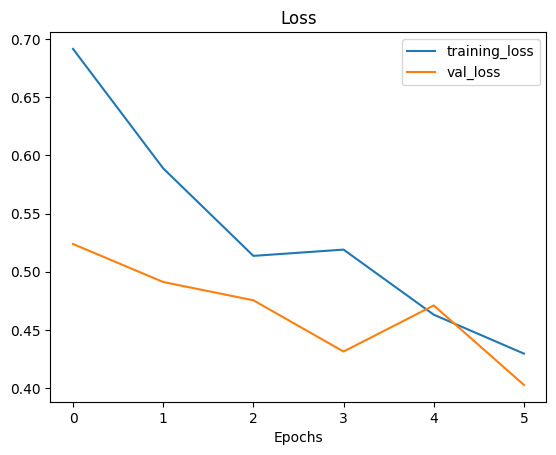

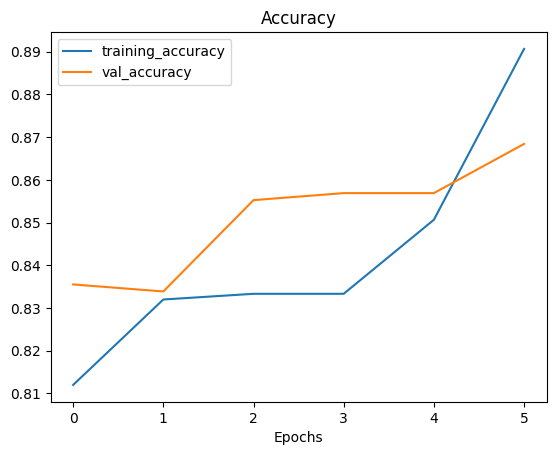

In [64]:
plot_loss_curves(history_fine_10_percent_data_aug)

In [65]:
model_2.evaluate(test_data)

79/79 [==============================] - 7s 79ms/step - loss: 0.4487 - accuracy: 0.8448


[0.4487059712409973, 0.8447999954223633]

The plot loss curves functions wirks grate with models which have only been fit once, however, we want sth to compare one series of running `fit()` with another (e.g. before and agter fine tuning)

In [71]:
# Let's create a function to compare training histories
def compare_history(original_history, new_history, initial_epochs = 5):
   """
   Compare two Tensorflows History Objects
   """
   # Get original history measurments
   acc = original_history.history["accuracy"]
   loss = original_history.history["loss"]

   val_acc = original_history.history["val_accuracy"]
   val_loss = original_history.history["val_loss"]

   # Combine the original history metrics with new_history metrics
   total_acc = acc + new_history.history["accuracy"]
   total_loss = loss + new_history.history["loss"]

   total_val_acc = acc + new_history.history["val_accuracy"]
   total_val_loss = loss + new_history.history["val_loss"]


   # Make plots for accuracy
   plt.figure(figsize =  (8, 8))
   plt.subplot(2, 1, 1)
   plt.plot(total_acc, label="Training_Accuracy")
   plt.plot(total_val_acc, label = "Validation_accuracy")
   plt.plot([initial_epochs -1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
   plt.legend(loc = "lower right")
   plt.title("Training and Validation Accuracy")

   # Make plots for Loss
   plt.figure(figsize =  (8, 8))
   plt.subplot(2, 1, 2)
   plt.plot(total_loss, label="T raining_Loss")
   plt.plot(total_val_loss, label = "Val_Loss")
   plt.plot([initial_epochs -1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
   plt.legend(loc = "upper right")
   plt.title("Training and Validation Accuracy")

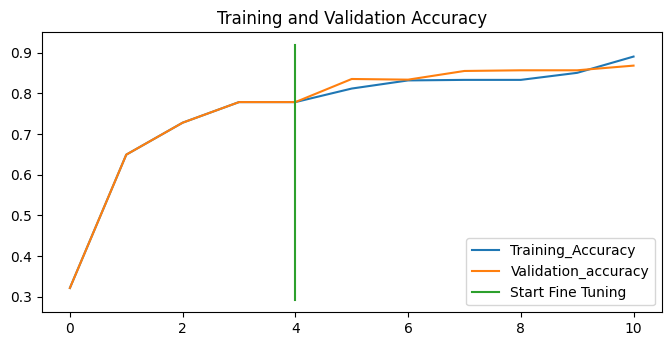

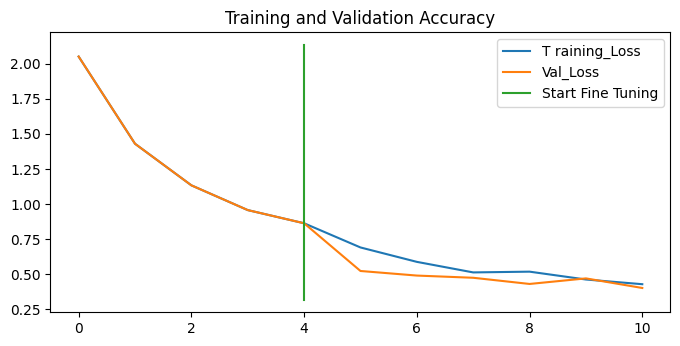

In [72]:
compare_history(original_history = history_10_percent_data_aug, new_history = history_fine_10_percent_data_aug)

## Model 4 : Fine tuning and existing model on all of the data

In [91]:
# Downalod and unzip 10 classes of Food101 data with all images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2024-06-09 13:41:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.207, 74.125.69.207, 64.233.181.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   219MB/s    in 2.3s    

2024-06-09 13:41:51 (219 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [92]:
unzip_data("/content/10_food_classes_all_data.zip")

In [93]:
# Setup training and testing dir
train_dir_all_data = "/content/10_food_classes_all_data/train"
test_dir = "/content/10_food_classes_all_data/test"


In [94]:
# How many images are we working with?
walk_through_dir("/content/10_food_classes_all_data")

There are 2 directories and 0 images in '/content/10_food_classes_all_data'.
There are 10 directories and 0 images in '/content/10_food_classes_all_data/test'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/ice_

In [95]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                 batch_size = 32,
                                                                                 label_mode = "categorical",
                                                                                 image_size=  IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                batch_size = 32,
                                                                image_size = IMG_SIZE,
                                                                label_mode = "categorical")


Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


The test data set we've loaded in is the same as what we've been using for previous experiments(ALL EXPERIMENTS have used the same test dataset)

Let's varify this

In [96]:
# Evaluate model 2 (This is the fine_truned on 10 percent of data version)
model_2.evaluate(test_data)

79/79 [==============================] - 6s 73ms/step - loss: 0.6728 - accuracy: 0.8244


[0.6727741956710815, 0.824400007724762]

To train a fine_tuning model (model_4) we need to revert model_2 back to its dgeature extraction weights

In [105]:
# Load the weights from the checkpoint, so that way we can fine_tune
# from the same stage the 10 percent data model was fine_tuned from
model_2.load_weights("/content/ten_percent_model_checkpoints_weights/checkpoint.ckpt.index")

Output hidden; open in https://colab.research.google.com to view.

In [106]:
# Let's evaluate model_2 now
model_2.evaluate(test_data)

79/79 [==============================] - 6s 64ms/step - loss: 0.6728 - accuracy: 0.8244


[0.6727741956710815, 0.824400007724762]

In [108]:
# Check to see if our model_2 has been reveter back to feature extraction results
results_10_percent_data_aug

[0.6727743744850159, 0.824400007724762]

In [110]:
# Check which layers are tunable in the whole model
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name,layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetv2-b0 True
3 global_average_pooling_layer True
4 output_layer True


In [112]:
# let's drill into our base_model (Efficient_net_B0)and see what layers are trainable
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name,layer.trainable)

0 input_4 False
1 rescaling_5 False
2 normalization_3 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [113]:
# Recompile the model
model_2.compile(loss = "categorical_crossentropy",
                optimizer = Adam(lr = 0.0001),
                metrics = ["accuracy"])


In [116]:
wandb.init(project="Model_5", entity="pouyazx4")


In [122]:
# Continue to train abd fine_tune the model to our data (100% of training data)
fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                           epochs = fine_tune_epochs,
                                           steps_per_epoch = len(train_data_10_classes_full),
                                           validation_data = test_data,
                                           validation_steps = int(0.25 * len(test_data)),
                                           initial_epoch = history_10_percent_data_aug.epoch[-1])

Epoch 5/10
229/235 [============================>.] - ETA: 0s

ValueError: Unexpected result of `train_function` (Empty logs). This could be due to issues in input pipeline that resulted in an empty dataset. Otherwise, please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.